**КТ3 - Выполнил Кирилл Запорожченко**

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("./var_16.csv")
data.head()

,Unnamed: 0,ID,NAME,r ankle_X,r ankle_Y,r knee_X,r knee_Y,r hip_X,r hip_Y,l hip_X,...,r shoulder_Y,l shoulder_X,l shoulder_Y,l elbow_X,l elbow_Y,l wrist_X,l wrist_Y,Scale,Activity,Category
0,11835,11836,066182160.jpg,863,919,811,863,727,668,897,...,320,925,345,1018,488,1152,569,8.161729,"water aerobics, water calisthenics",water activities
1,11836,11837,082727695.jpg,-1,-1,-1,-1,814,863,1059,...,482,1195,531,1260,690,1248,928,12.206094,"water aerobics, water calisthenics",water activities
2,11837,11838,068540662.jpg,1468,562,1338,562,1043,457,1049,...,407,628,708,395,922,178,916,10.704780,"water aerobics, water calisthenics",water activities
3,11838,11839,016544164.jpg,-1,-1,510,549,640,429,752,...,185,859,214,905,437,841,487,4.939338,"drums, sitting",music playing
4,11839,11840,064918928.jpg,-1,-1,580,675,346,599,510,...,255,475,235,528,330,685,305,5.824687,"drums, sitting",music playing


In [3]:
# Столбцы с кооридинатами частей тела
KEYPOINTS_COLUMN_NAMES = ['r ankle_X', 'r ankle_Y', 'r knee_X', 'r knee_Y', 'r hip_X', 'r hip_Y', 'l hip_X', 'l hip_Y', 'l knee_X', 'l knee_Y', 'l ankle_X', 'l ankle_Y', 'pelvis_X', 'pelvis_Y', 'thorax_X', 'thorax_Y', 'upper neck_X', 'upper neck_Y', 'head top_X', 'head top_Y', 'r wrist_X', 'r wrist_Y', 'r elbow_X', 'r elbow_Y', 'r shoulder_X', 'r shoulder_Y', 'l shoulder_X', 'l shoulder_Y', 'l elbow_X', 'l elbow_Y', 'l wrist_X', 'l wrist_Y']

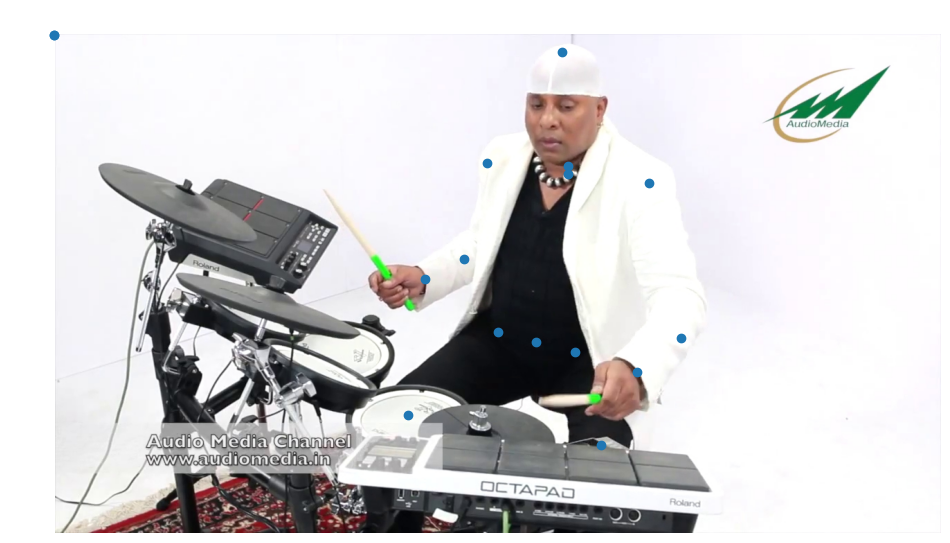

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Загрузка изображения
image_name = '016544164.jpg'
sample_img = Image.open(os.path.join('./images', image_name))

# Получение координат ключевых точек
sample_keypoints = data[data['NAME'] == image_name]
Xs = [sample_keypoints[col].values[0] for col in KEYPOINTS_COLUMN_NAMES if col.endswith('_X')]
Ys = [sample_keypoints[col].values[0] for col in KEYPOINTS_COLUMN_NAMES if col.endswith('_Y')]

# Создание графика
plt.figure(figsize=(12, 7))
plt.imshow(sample_img)
plt.scatter(Xs, Ys)
plt.axis('off')
plt.show()


Словарь категорий

In [5]:
key_category = {i: category for i, category in enumerate(data['Category'].unique())}
key_category

{0: 'water activities',
 1: 'music playing',
 2: 'occupation',
 3: 'self care',
 4: 'miscellaneous',
 5: 'winter activities',
 6: 'inactivity quiet/light',
 7: 'walking',
 8: 'bicycling',
 9: 'home activities',
 10: 'home repair',
 11: 'sports',
 12: 'dancing',
 13: '[]'}

Почистим датасет от строк с пустой категорией

In [6]:
ndf = data[data['Category'] == '[]']
ndf

,Unnamed: 0,ID,NAME,r ankle_X,r ankle_Y,r knee_X,r knee_Y,r hip_X,r hip_Y,l hip_X,...,r shoulder_Y,l shoulder_X,l shoulder_Y,l elbow_X,l elbow_Y,l wrist_X,l wrist_Y,Scale,Activity,Category
711,12546,12547,021095272.jpg,-1,-1,914,564,896,423,946,...,213,976,200,1019,295,1033,346,3.082949,[],[]
712,12547,12548,037022949.jpg,529,525,525,416,518,307,567,...,174,591,162,646,223,674,285,2.608945,[],[]


In [7]:
data = data[data['Category'] != '[]']

Словарь категорий без "пустой"

In [8]:
key_category = {i: category for i, category in enumerate(data['Category'].unique())}
key_category

{0: 'water activities',
 1: 'music playing',
 2: 'occupation',
 3: 'self care',
 4: 'miscellaneous',
 5: 'winter activities',
 6: 'inactivity quiet/light',
 7: 'walking',
 8: 'bicycling',
 9: 'home activities',
 10: 'home repair',
 11: 'sports',
 12: 'dancing'}

In [9]:
category_key = {category: i for i, category in enumerate(data['Category'].unique())}
category_key

{'water activities': 0,
 'music playing': 1,
 'occupation': 2,
 'self care': 3,
 'miscellaneous': 4,
 'winter activities': 5,
 'inactivity quiet/light': 6,
 'walking': 7,
 'bicycling': 8,
 'home activities': 9,
 'home repair': 10,
 'sports': 11,
 'dancing': 12}

Разделяем датасет на выборки для обучения и валидации

In [10]:
train_val_partition = 0.80
train_val_n = int(train_val_partition * len(data))

train_data = data.iloc[:train_val_n]
val_data = data.iloc[train_val_n:]

Формируем YOLOv датасет

In [11]:
point_names = list(set([col.split('_')[0] for col in KEYPOINTS_COLUMN_NAMES]))
point_names

['l knee',
 'r hip',
 'l elbow',
 'l ankle',
 'pelvis',
 'upper neck',
 'r knee',
 'l hip',
 'thorax',
 'r elbow',
 'head top',
 'r shoulder',
 'l shoulder',
 'l wrist',
 'r wrist',
 'r ankle']

Функция для создания файла меток для изображения

In [12]:
def write_label_date(row, dir, image_name, bbox_offset=50):
    img = Image.open(os.path.join('./images', f'{image_name}.jpg'))
    width, height = img.width, img.height

    point_names = list(set([col.split('_')[0] for col in KEYPOINTS_COLUMN_NAMES]))
    Xs = [float(row[col+'_X']) for col in point_names if row[col+'_X'] > 0]
    Ys = [float(row[col+'_Y']) for col in point_names if row[col+'_Y'] > 0]
    min_x, max_x = max(min(Xs) - bbox_offset, 0), min(max(Xs) + bbox_offset, width)     # Координаты для нахождения ограничивающего прямоугольника
    min_y, max_y = max(min(Ys) - bbox_offset, 0), min(max(Ys) + bbox_offset, height)    #
    
        
    with open(os.path.join(dir, image_name+'.txt'), 'w') as label_file:
        str_out = ""
        str_out += str(category_key[row['Category']]) + " "                 # Ключ категории
        str_out += str((min_x + (max_x - min_x) / 2) / width) + " "         # Нормализованные координаты центра ограничивающего прямоугольника
        str_out += str((min_y + (max_y - min_y) / 2) / height) + " "        #
        str_out += str((max_x - min_x) / width) + " "                       # Нормализованная ширина огр. прямоугольника (отн. ширины изображения)
        str_out += str((max_y - min_y) / height) + " "                      # Нормализованная выстора огр. прямоугольника (отн. высоты изображения)

        for point in point_names:
            x = float(row[point+'_X'])
            y = float(row[point+'_Y'])

            if x < 0 or y < 0:
                str_out += "0.0 0.0 0 "                                     # Формат "x y <class>", 0 - т. к. точки не существует
            else:
                str_out += str(x / width) + " " + str(y / height) + " 2 "   # Формат "x y <class>", 2 - класс для всех частей тела
        
        label_file.write(str_out)

Итерируем по изображениям из тестовой и валидационной выборок, для каждого изображения создаем файл меток

In [13]:
import shutil


yolov_ds_path = './yolov_dataset'


os.makedirs(yolov_ds_path, exist_ok=True)
for part in ['train', 'valid']:
    os.makedirs(os.path.join(yolov_ds_path, part, 'images'), exist_ok=True)
    os.makedirs(os.path.join(yolov_ds_path, part, 'labels'), exist_ok=True)

# train
for _, row in train_data.iterrows():
    image_name = row['NAME'].split('.')[0]
    img = Image.open(os.path.join('./images', f'{image_name}.jpg'))

    shutil.copy(
        f'./images/{image_name}.jpg',
        f'{yolov_ds_path}/train/images/{image_name}.jpg'
    )

    write_label_date(row, f'{yolov_ds_path}/train/labels/', image_name)

#validate
for _, row in val_data.iterrows():
    image_name = row['NAME'].split('.')[0]
    img = Image.open(os.path.join('./images', f'{image_name}.jpg'))

    shutil.copy(
        f'./images/{image_name}.jpg',
        f'{yolov_ds_path}/valid/images/{image_name}.jpg'
    )

    write_label_date(row, f'{yolov_ds_path}/valid/labels/', image_name)

Обучение модели

In [14]:
# Данные для заполнения в data.yaml
print(list(category_key.keys()))
print(len(list(category_key.keys())))

['water activities', 'music playing', 'occupation', 'self care', 'miscellaneous', 'winter activities', 'inactivity quiet/light', 'walking', 'bicycling', 'home activities', 'home repair', 'sports', 'dancing']
13


In [15]:
from ultralytics import YOLO

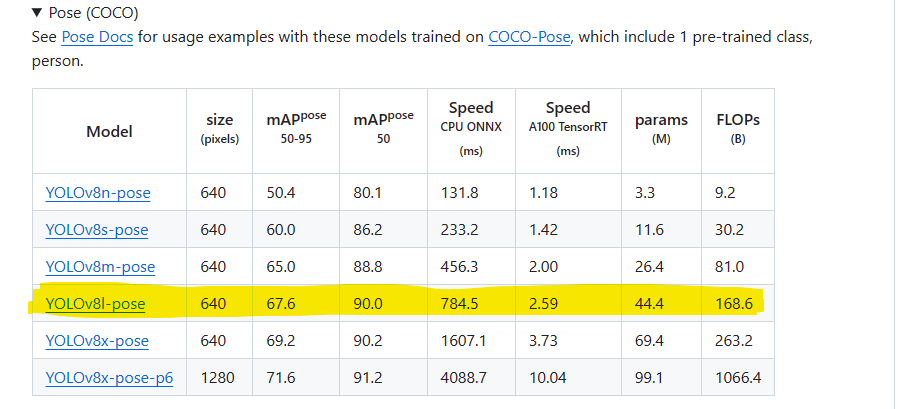

In [16]:
Image.open(os.path.join('./choosed_model.png'))

In [17]:
model = YOLO("yolov8l-pose.pt")

In [18]:
import torch
import torchvision

# Ensure CUDA availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming your model and data are already defined
model.to(device)

results = model.train(data='./yolov_dataset/data.yaml', epochs=100, imgsz=640, batch=8)

c:\Users\Kreal\miniconda3\envs\ts\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


engine\trainer: task=pose, mode=train, model=yolov8l-pose.pt, data=./yolov_dataset/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8

c:\Users\Kreal\miniconda3\envs\ts\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed 


train: Scanning C:\Users\Kreal\Documents\VUZ\psuObjectDecection\KT3\yolov_dataset\train\labels... 631 images, 0 backgrounds, 0 corrupt: 100%|██████████| 631/631 [00:00<00:00, 892.67it/s]


train: New cache created: C:\Users\Kreal\Documents\VUZ\psuObjectDecection\KT3\yolov_dataset\train\labels.cache
WARNING  No 'flip_idx' array defined in data.yaml, setting augmentation 'fliplr=0.0'
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\Kreal\Documents\VUZ\psuObjectDecection\KT3\yolov_dataset\valid\labels... 159 images, 1 backgrounds, 0 corrupt: 100%|██████████| 159/159 [00:00<00:00, 559.26it/s]

val: New cache created: C:\Users\Kreal\Documents\VUZ\psuObjectDecection\KT3\yolov_dataset\valid\labels.cache


Plotting labels to runs\pose\train8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 103 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\pose\train8
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.41G      1.329      9.567      0.708      3.352      1.597         20        640: 100%|██████████| 79/79 [01:16<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.92it/s]

                   all        159        158      0.683      0.145      0.208      0.124    0.00011     0.0263   0.000141   1.41e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.37G      1.331      7.621     0.6496      2.861      1.592         14        640: 100%|██████████| 79/79 [00:28<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.20it/s]

                   all        159        158      0.355      0.181       0.15     0.0819      0.277      0.083     0.0232    0.00338



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/100       6.4G      1.331      6.892     0.6114       2.73      1.625         11        640: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.16it/s]

                   all        159        158      0.629     0.0978      0.115     0.0499      0.515     0.0254    0.00353   0.000471



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.32G      1.401      6.694     0.5819       2.63      1.687         17        640: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.16it/s]

                   all        159        158      0.136      0.146     0.0909     0.0372     0.0771     0.0254     0.0209    0.00478



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.31G      1.432      6.587     0.5608      2.603      1.688         15        640: 100%|██████████| 79/79 [00:28<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.21it/s]

                   all        159        158      0.127       0.13      0.118     0.0531     0.0754     0.0725     0.0566     0.0115



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.32G       1.44      6.287     0.5441      2.491      1.702         14        640: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.16it/s]

                   all        159        158      0.135      0.101      0.108     0.0551     0.0601     0.0435     0.0224    0.00411



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.31G      1.314      5.983     0.5185      2.267      1.642         16        640: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.25it/s]

                   all        159        158      0.173      0.191      0.137     0.0763     0.0724      0.106     0.0328    0.00687



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.31G      1.368      5.964     0.5191      2.278      1.667         20        640: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.24it/s]

                   all        159        158      0.127      0.123      0.135     0.0707      0.123     0.0543     0.0602     0.0128



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/100       6.4G       1.37       5.93     0.4917       2.26      1.669         16        640: 100%|██████████| 79/79 [00:28<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.26it/s]

                   all        159        158      0.135      0.105      0.132     0.0569     0.0706     0.0543     0.0491     0.0129



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.15G      1.309      5.657     0.4961      2.186      1.611         17        640: 100%|██████████| 79/79 [00:28<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.25it/s]

                   all        159        158      0.163      0.118       0.15     0.0776     0.0979     0.0754     0.0655     0.0173



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/100       6.3G      1.246      5.572     0.4886      2.058       1.58         18        640: 100%|██████████| 79/79 [00:28<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.21it/s]

                   all        159        158      0.182      0.121      0.144      0.073      0.106     0.0675     0.0627     0.0195



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/100       6.3G      1.239      5.374     0.4703      1.952      1.558         14        640: 100%|██████████| 79/79 [00:28<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.20it/s]

                   all        159        158      0.141      0.101      0.128     0.0675        0.1     0.0688     0.0573     0.0158



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.31G      1.215      5.196     0.4623      1.896      1.568         17        640: 100%|██████████| 79/79 [00:28<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.25it/s]

                   all        159        158      0.129      0.109      0.129     0.0742      0.147     0.0616     0.0633     0.0188



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/100       6.3G      1.193        5.1     0.4582      1.837      1.523         13        640: 100%|██████████| 79/79 [00:28<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.20it/s]

                   all        159        158       0.19      0.104      0.177     0.0955      0.144      0.079     0.0919     0.0255



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.32G      1.136      5.062     0.4465      1.707       1.48         21        640: 100%|██████████| 79/79 [00:28<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.23it/s]

                   all        159        158        0.2      0.161      0.156     0.0758      0.128      0.111     0.0793     0.0266



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/100       6.3G      1.137      4.804     0.4262      1.657      1.491         13        640: 100%|██████████| 79/79 [00:28<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.25it/s]

                   all        159        158      0.149      0.153      0.155     0.0792      0.111      0.117     0.0908      0.025



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.39G      1.117      4.721     0.4282       1.73      1.468         14        640: 100%|██████████| 79/79 [00:28<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.35it/s]

                   all        159        158      0.192      0.134       0.14     0.0766      0.121     0.0959     0.0705     0.0207



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.14G      1.123      4.814     0.4109      1.661      1.491         20        640: 100%|██████████| 79/79 [00:27<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.39it/s]

                   all        159        158      0.214       0.14      0.162     0.0892      0.144      0.107      0.088     0.0279



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.29G      1.109      4.649     0.4099      1.565      1.497         15        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.33it/s]

                   all        159        158      0.184      0.131      0.157     0.0923      0.147      0.106      0.103      0.031



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/100       6.3G      1.064       4.53     0.4041      1.586      1.442         18        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.38it/s]

                   all        159        158      0.169      0.121      0.136     0.0775     0.0829     0.0603      0.049     0.0141



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/100       6.3G      1.019       4.41     0.4033      1.488      1.391         17        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.36it/s]

                   all        159        158      0.221      0.199      0.159      0.087      0.179      0.178      0.104     0.0315



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/100       6.3G      1.015      4.413      0.397      1.413       1.39         14        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.41it/s]

                   all        159        158      0.226       0.11      0.145     0.0863       0.19      0.102      0.114     0.0402



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.32G      1.007      4.385     0.3996      1.403        1.4         22        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.37it/s]

                   all        159        158      0.215        0.2      0.174     0.0924      0.173      0.173      0.124     0.0439



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/100       6.3G      0.992      4.262     0.3865      1.395      1.374         15        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.34it/s]

                   all        159        158      0.207      0.161      0.152      0.087      0.152      0.117     0.0949     0.0341



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.38G     0.9475      4.156     0.3843       1.35      1.373         20        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        159        158      0.187      0.151      0.154     0.0839      0.151      0.117      0.104     0.0279



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.14G     0.9722      4.139     0.3641      1.324      1.379         19        640: 100%|██████████| 79/79 [00:27<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.38it/s]

                   all        159        158      0.202      0.209      0.162     0.0934      0.155     0.0807      0.106     0.0378



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.29G     0.9202      4.053     0.3684      1.258      1.331         17        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.40it/s]

                   all        159        158      0.176      0.211      0.164     0.0989      0.159     0.0856      0.118     0.0423



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/100       6.3G     0.9183      3.979     0.3751      1.205      1.332         14        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.30it/s]

                   all        159        158      0.218       0.15       0.18      0.102      0.205      0.132      0.138     0.0526



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.31G     0.8836      4.033     0.3645      1.204      1.316         19        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.38it/s]

                   all        159        158      0.257      0.116      0.172      0.103       0.24      0.108      0.136     0.0505



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.29G     0.8689      3.922      0.358      1.175      1.303         17        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        159        158      0.243      0.106      0.162     0.0949      0.198     0.0903      0.103     0.0351



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/100       6.3G     0.8759      3.854     0.3556       1.14      1.288         16        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.21it/s]

                   all        159        158      0.267      0.162       0.19      0.112       0.25      0.153      0.154     0.0483



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.29G     0.8791      3.764     0.3558      1.139      1.305         12        640: 100%|██████████| 79/79 [00:28<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.40it/s]

                   all        159        158      0.224      0.133      0.162     0.0993      0.208      0.124      0.126     0.0436



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.38G       0.84       3.72     0.3542      1.066       1.28         13        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.36it/s]

                   all        159        158      0.245      0.131      0.183      0.102      0.272      0.104      0.135     0.0453



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.13G     0.8237      3.572     0.3452      1.037      1.255         15        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.43it/s]

                   all        159        158      0.184      0.132      0.169     0.0954      0.163       0.12      0.128     0.0509



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/100       6.3G     0.8279      3.623     0.3471      1.078       1.27         11        640: 100%|██████████| 79/79 [00:28<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.41it/s]

                   all        159        158      0.252       0.28      0.166     0.0956      0.218      0.207      0.121     0.0447



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.29G      0.835       3.69     0.3403      1.008      1.264         17        640: 100%|██████████| 79/79 [00:28<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.43it/s]

                   all        159        158      0.211      0.111      0.161     0.0975      0.161     0.0856     0.0997     0.0345



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.29G     0.7918      3.589     0.3339      1.062      1.252         15        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        159        158     0.0985      0.601      0.189      0.106      0.111      0.215      0.112     0.0451



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.29G     0.7822      3.456     0.3475          1       1.24         17        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.43it/s]

                   all        159        158      0.219      0.111      0.165     0.0969      0.193     0.0949       0.12     0.0489



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.33G     0.7757       3.44      0.326     0.9435      1.228         19        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.39it/s]

                   all        159        158      0.167      0.159      0.161      0.103      0.228      0.102      0.133     0.0513



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/100       6.3G     0.7621      3.401     0.3239      0.977      1.203         15        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.38it/s]

                   all        159        158     0.0948      0.455      0.173      0.108     0.0766      0.281       0.13      0.052



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.42G     0.7915      3.459     0.3366     0.9364      1.251         19        640: 100%|██████████| 79/79 [00:27<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        159        158      0.232      0.112      0.152     0.0862      0.176     0.0834      0.103     0.0315



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.14G      0.736      3.326     0.3199     0.9206      1.204         18        640: 100%|██████████| 79/79 [00:27<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.43it/s]

                   all        159        158      0.218      0.111      0.167      0.097      0.197        0.1      0.145     0.0407



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.29G     0.7357      3.242     0.3216     0.8897      1.202         17        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        159        158      0.206      0.256      0.192      0.113      0.209      0.134      0.147     0.0578



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.29G     0.7308      3.308     0.3252     0.8856      1.202         17        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.36it/s]

                   all        159        158      0.105      0.293      0.161     0.0997      0.091      0.258      0.143     0.0525



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.29G      0.724      3.186     0.3223     0.8691      1.183         12        640: 100%|██████████| 79/79 [00:28<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        159        158      0.122      0.578      0.188      0.112     0.0857       0.31       0.13     0.0564



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.31G      0.706      3.287     0.3368     0.8678       1.18         10        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.37it/s]

                   all        159        158      0.218      0.113      0.175      0.105      0.281      0.102      0.153     0.0596



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/100       6.3G     0.7183      3.123     0.3218     0.8894      1.185         20        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        159        158     0.0664      0.586      0.126     0.0754      0.152      0.122      0.107     0.0393



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.29G      0.683       2.96     0.3173     0.8369      1.155         19        640: 100%|██████████| 79/79 [00:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.41it/s]

                   all        159        158      0.241     0.0994      0.153     0.0919      0.223     0.0918      0.138     0.0545



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.38G     0.6836      3.051     0.3116     0.8088       1.16         17        640: 100%|██████████| 79/79 [00:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.38it/s]

                   all        159        158      0.299      0.288        0.2      0.114      0.301       0.14      0.163     0.0589



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.14G     0.6703       3.07     0.3099     0.8342      1.152         14        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.38it/s]

                   all        159        158      0.261      0.136      0.177      0.108      0.273      0.121      0.152     0.0632



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.29G     0.6563      2.909     0.3216     0.7791      1.146         14        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.43it/s]

                   all        159        158      0.102      0.298      0.145      0.101     0.0901      0.218      0.111     0.0408



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.29G     0.6557      2.885     0.3165     0.7934      1.155         22        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        159        158     0.0866      0.374      0.144     0.0894      0.157      0.114      0.117     0.0553



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.31G     0.6269      2.983     0.3138     0.7444       1.11         16        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.39it/s]

                   all        159        158      0.285      0.098      0.135     0.0877      0.225     0.0799     0.0936      0.034



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/100       6.3G     0.6392       2.98     0.3158     0.7771      1.139         15        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.44it/s]

                   all        159        158      0.172     0.0725      0.129     0.0835      0.158     0.0652      0.112     0.0432



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/100       6.3G     0.6033      2.775     0.3104     0.7068      1.098         17        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        159        158     0.0899      0.328      0.155      0.102     0.0823      0.251      0.134     0.0496



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/100       6.3G     0.5921        2.9     0.3057      0.703      1.096         15        640: 100%|██████████| 79/79 [00:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        159        158      0.301      0.115      0.164      0.103       0.27      0.104      0.129     0.0568



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.39G     0.5926      2.715     0.2882     0.6878      1.095         11        640: 100%|██████████| 79/79 [00:28<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.37it/s]

                   all        159        158      0.106      0.334      0.162      0.104      0.123      0.262      0.152     0.0662



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.13G     0.6224      2.818     0.3142     0.7399      1.125         14        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.43it/s]

                   all        159        158      0.112      0.421      0.169       0.11      0.166      0.154      0.137     0.0526



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.29G     0.6185      2.859     0.3076     0.6988      1.124         14        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.43it/s]

                   all        159        158     0.0969      0.288      0.156      0.097     0.0852      0.257      0.134     0.0567



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.29G      0.582      2.652     0.3003     0.6781      1.098         17        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.39it/s]

                   all        159        158     0.0842      0.249      0.141     0.0924     0.0793      0.238      0.129     0.0554



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.29G     0.5682      2.726     0.3015     0.6509      1.083          8        640: 100%|██████████| 79/79 [00:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        159        158     0.0817      0.176       0.12     0.0884     0.0757      0.165      0.108     0.0434



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/100       6.3G     0.5701      2.597     0.2906      0.663      1.082         14        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.35it/s]

                   all        159        158      0.261      0.108      0.137     0.0874      0.249      0.105      0.128     0.0519



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/100       6.3G      0.584      2.604     0.2914     0.6564      1.097         21        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.38it/s]

                   all        159        158      0.147      0.511      0.171      0.114      0.142      0.323      0.166     0.0727



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.31G     0.5534       2.58     0.2941      0.632       1.09         13        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.36it/s]

                   all        159        158      0.116      0.377      0.166       0.11      0.108      0.245      0.153     0.0671



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.39G     0.5505      2.415     0.2731     0.6447      1.068         16        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.44it/s]

                   all        159        158     0.0913      0.285      0.135     0.0943      0.209      0.102      0.132     0.0571



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.15G     0.5535      2.447      0.286     0.6246      1.075         17        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.40it/s]

                   all        159        158      0.111      0.342      0.153      0.101      0.123      0.231      0.133     0.0606



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/100       6.3G     0.5478      2.495     0.2874     0.6227      1.066         12        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        159        158     0.0847      0.321      0.138     0.0947     0.0795      0.251      0.131      0.057



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/100       6.3G     0.5545      2.518     0.2797     0.6019      1.075         19        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.47it/s]

                   all        159        158      0.119      0.365      0.143     0.0943      0.111      0.296      0.124     0.0542



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/100       6.3G     0.5274      2.422      0.282     0.6018      1.059         12        640: 100%|██████████| 79/79 [00:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.43it/s]

                   all        159        158        0.1      0.248      0.133     0.0889     0.0909      0.174      0.114     0.0527



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/100       6.3G      0.525      2.443     0.2867     0.5823      1.071         23        640: 100%|██████████| 79/79 [00:28<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.38it/s]

                   all        159        158      0.145       0.39      0.163      0.115      0.135      0.257      0.151     0.0679



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/100       6.3G     0.5099      2.395     0.2861     0.5705      1.048          8        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.41it/s]

                   all        159        158     0.0919      0.364      0.141     0.0995     0.0883      0.255      0.132     0.0541



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/100       6.3G     0.5061      2.277     0.2854     0.5642      1.045         14        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.40it/s]

                   all        159        158      0.105      0.418       0.14      0.101     0.0969      0.286      0.125     0.0581



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.39G     0.5123      2.492     0.2981     0.5911      1.048         14        640: 100%|██████████| 79/79 [00:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        159        158      0.105      0.427      0.145      0.105     0.0925      0.287      0.129      0.057



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.14G     0.4878      2.363     0.2742     0.5451      1.037         17        640: 100%|██████████| 79/79 [00:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.33it/s]

                   all        159        158      0.113      0.348       0.16      0.107      0.106      0.278       0.15     0.0684



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.29G      0.515      2.319     0.2852     0.5805      1.061         18        640: 100%|██████████| 79/79 [00:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.39it/s]

                   all        159        158      0.136        0.4      0.162      0.107      0.129       0.33      0.147     0.0707



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/100       6.3G      0.501      2.398     0.2908     0.5534      1.035         23        640: 100%|██████████| 79/79 [00:28<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.39it/s]

                   all        159        158     0.0829      0.271      0.122     0.0846     0.0736      0.194     0.0963     0.0437



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.29G     0.4767       2.13     0.2746     0.5504      1.022         18        640: 100%|██████████| 79/79 [00:28<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.37it/s]

                   all        159        158      0.115      0.344      0.152      0.106      0.104      0.208      0.141     0.0643



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/100       6.3G     0.4813      2.174     0.2699     0.5439      1.037         19        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.43it/s]

                   all        159        158      0.129      0.204      0.142      0.106      0.119      0.194      0.126     0.0615



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.32G       0.48      2.069     0.2764     0.5274      1.024         22        640: 100%|██████████| 79/79 [00:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.44it/s]

                   all        159        158      0.121        0.2      0.145      0.109      0.115      0.193      0.131     0.0633



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.31G     0.4635       2.05     0.2713     0.5043      1.027         19        640: 100%|██████████| 79/79 [00:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.40it/s]

                   all        159        158      0.132      0.225      0.144      0.111      0.128      0.222      0.137     0.0619



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.39G     0.4784      2.156     0.2745     0.5302      1.031         18        640: 100%|██████████| 79/79 [00:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.40it/s]

                   all        159        158      0.132      0.165       0.14      0.107      0.128      0.161      0.133     0.0627



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.13G     0.4536      2.142      0.272     0.5104      1.014         18        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.39it/s]

                   all        159        158      0.105      0.145      0.124     0.0942     0.0959      0.134      0.106      0.053



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.29G     0.4493       2.11     0.2798     0.5131      1.014         19        640: 100%|██████████| 79/79 [00:28<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        159        158      0.131      0.212      0.148       0.11      0.124      0.204      0.138     0.0648



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.29G     0.4377      2.007     0.2702     0.4951      1.007         17        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.50it/s]

                   all        159        158      0.108      0.214      0.136        0.1     0.0998      0.203       0.12     0.0552



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.29G     0.4425      2.068     0.2694     0.4953      1.016         20        640: 100%|██████████| 79/79 [00:28<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.45it/s]

                   all        159        158      0.127      0.228      0.149      0.103      0.125      0.225      0.147     0.0672



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.29G       0.44      2.032     0.2715     0.4823      1.003         16        640: 100%|██████████| 79/79 [00:28<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.43it/s]

                   all        159        158      0.152      0.221      0.156      0.105      0.145      0.214      0.147     0.0702



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.29G     0.4285      1.964     0.2655     0.4634          1         20        640: 100%|██████████| 79/79 [00:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.43it/s]

                   all        159        158      0.121      0.227       0.14     0.0962      0.118      0.223      0.138     0.0694



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.29G     0.4268      1.877     0.2645     0.4589      1.002         15        640: 100%|██████████| 79/79 [00:28<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.44it/s]

                   all        159        158      0.124      0.195      0.141     0.0969      0.115      0.184      0.128     0.0658



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.37G     0.4133        1.9     0.2689      0.472      1.003         12        640: 100%|██████████| 79/79 [00:28<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.47it/s]

                   all        159        158      0.137      0.184       0.14     0.0981       0.13      0.177      0.133     0.0681



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.13G     0.4193      1.912      0.273     0.4799     0.9908         15        640: 100%|██████████| 79/79 [00:27<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.49it/s]

                   all        159        158      0.132      0.145      0.137        0.1       0.12      0.134      0.126     0.0625


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.28G     0.2923      1.251     0.1374     0.3001     0.8649          7        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.45it/s]

                   all        159        158     0.0968      0.178      0.125     0.0839     0.0944      0.174      0.119     0.0539



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.29G     0.2776      1.185     0.1373     0.2831     0.8592          7        640: 100%|██████████| 79/79 [00:27<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.44it/s]

                   all        159        158      0.127      0.199      0.136     0.0935      0.124      0.195      0.134     0.0637



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/100       6.3G     0.2702      1.181     0.1258      0.282     0.8575          7        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.37it/s]

                   all        159        158      0.144      0.208      0.154      0.109      0.141      0.204      0.151     0.0699



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.29G     0.2643      1.164     0.1264     0.2744      0.866          7        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.49it/s]

                   all        159        158      0.155      0.177      0.148      0.113      0.142      0.166      0.131     0.0732



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/100       6.3G      0.256      1.143     0.1217     0.2685     0.8527          7        640: 100%|██████████| 79/79 [00:27<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.44it/s]

                   all        159        158      0.141      0.197      0.146      0.108      0.137      0.194      0.143     0.0701



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/100       6.3G     0.2478       1.09     0.1215     0.2565     0.8399          7        640: 100%|██████████| 79/79 [00:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.43it/s]

                   all        159        158      0.126      0.184      0.138      0.101      0.119      0.177      0.128     0.0662



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.38G     0.2365      1.083     0.1175     0.2554      0.837          7        640: 100%|██████████| 79/79 [00:27<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.46it/s]

                   all        159        158      0.133      0.184      0.138      0.102      0.129       0.18      0.136     0.0669



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.13G     0.2257      1.072     0.1172     0.2438     0.8245          7        640: 100%|██████████| 79/79 [00:27<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.43it/s]

                   all        159        158      0.137      0.171      0.139      0.104       0.13      0.164      0.129     0.0664



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.29G     0.2198      1.041      0.117     0.2442     0.8293          7        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.49it/s]

                   all        159        158      0.139      0.171      0.141      0.105      0.132      0.164      0.131     0.0655



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.28G     0.2292      1.034     0.1146     0.2415     0.8345          7        640: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        159        158      0.138      0.171      0.141      0.107      0.131      0.164      0.131     0.0672



100 epochs completed in 0.992 hours.
Optimizer stripped from runs\pose\train8\weights\last.pt, 89.4MB
Optimizer stripped from runs\pose\train8\weights\best.pt, 89.4MB

Validating runs\pose\train8\weights\best.pt...
Ultralytics YOLOv8.2.15  Python-3.10.11 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLOv8l-pose summary (fused): 287 layers, 44474247 parameters, 0 gradients, 168.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.64it/s]


                   all        159        158      0.148      0.511      0.171      0.114      0.144      0.323      0.166     0.0736
            occupation        159         69      0.451      0.464      0.539      0.387      0.451      0.464      0.545      0.224
         miscellaneous        159          4     0.0221          1     0.0299    0.00941    0.00552       0.25    0.00411    0.00123
                sports        159         19       0.12      0.579      0.117     0.0603       0.12      0.579      0.117     0.0692
               dancing        159         66          0          0          0          0          0          0          0          0
Speed: 0.1ms preprocess, 9.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\pose\train8



image 1/1 c:\Users\Kreal\Documents\VUZ\psuObjectDecection\KT3\image.jpg: 384x640 1 occupation, 105.3ms
Speed: 1.0ms preprocess, 105.3ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)


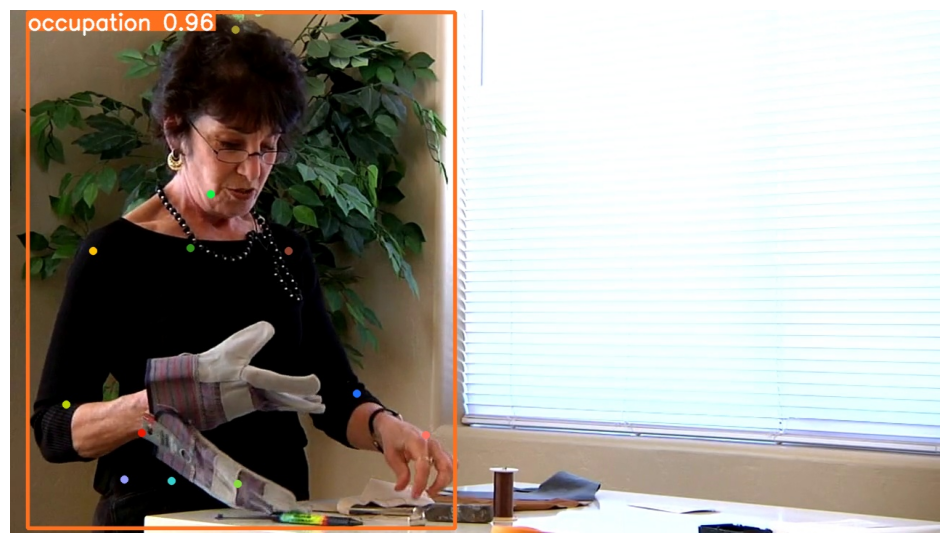

In [19]:
results = model("image.jpg")

for result in results:
    result.save("result.jpg")

plt.figure(figsize=(12, 7))

plt.imshow(Image.open("result.jpg"))
plt.axis('off')

plt.show()

**occupation - занятость (с англ.)**

**Выводы**

В ходе выполнения работы, я получил опыт взаимодействия с моделью YOLOv8, примененной с целью обнаружения человека на изображении и определения активности, в которой он(а) участвует. Разобрался с загрузкой и преобразованием исходных данных в формат YOLO для корректного обучения модели, а также с настройкой среды, для выполнения вышеописанных действий. 
Для обучения модели применена предобученная модель yolov8l-pose.pt источник: https://github.com/ultralytics/ultralytics